In [1]:
#%config InlineBackend.figure_formats = ['svg']
%config InlineBackend.figure_format = 'retina'
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from tqdm.auto import tqdm

In [2]:
def read_npz(file):
    file = np.load(file)
    if "arr_0" in file:
        fp = file["arr_0"]
    else:
        fp = file["fps"]
    file.close()
    fp = np.unpackbits(fp, axis=1)
    return fp

In [3]:
experiment = "output"

In [4]:
#colors = "Set1"
colors = sns.color_palette(["gray", "royalblue", "limegreen", "fuchsia"])

In [5]:
all_data = pd.read_csv(f"{experiment}/promiscuous_processed.csv")
all_data["class_set"] = all_data[["class","set"]].apply(lambda x: ' '.join(x), axis=1)

In [6]:
all_data

,cids,NostereoAromaticSMILES,rdkit_smiles,class,set,inactive,active,encodable,NLL_0,NLL_1,...,NLL_192,NLL_193,NLL_194,NLL_195,NLL_196,NLL_197,NLL_198,NLL_199,NLL_200,class_set
0,1483729,C#CCN1c2ccccc2Sc3c1nccc3,C#CCN1c2ccccc2Sc2cccnc21,multitarget,training,174,6,True,21.387634,21.237390,...,16.529953,16.579832,16.597193,16.598688,16.543293,16.469414,16.514149,16.565979,16.504505,multitarget training
1,2803060,C#CCSc1c(c(sn1)SCC#C)C#N,C#CCSc1nsc(SCC#C)c1C#N,multitarget,training,244,6,True,25.435406,25.543407,...,16.977541,17.072138,17.067848,17.018055,16.830230,16.742233,16.677542,16.708557,16.730461,multitarget training
2,16195846,C#Cc1ccc(cc1)C2CC(OC(=C2)C(=O)N3CCN(CC3)Cc4ccc...,C#Cc1ccc(C2C=C(C(=O)N3CCN(Cc4ccccc4)CC3)OC(OCC...,multitarget,training,151,6,True,26.490920,26.334568,...,20.697884,20.671890,20.672901,20.686928,20.666473,20.573582,20.579933,20.707083,20.698412,multitarget training
3,15910,C(#N)c1c(c(c(c(c1Cl)Cl)Cl)C#N)Cl,N#Cc1c(Cl)c(Cl)c(Cl)c(C#N)c1Cl,multitarget,test,24,5,True,16.172943,16.166480,...,14.846571,15.024720,14.982287,14.865892,14.852013,14.901800,14.970851,15.054768,14.919376,multitarget test
4,219402,C(=O)C(C1C(C(C(=O)O1)O)O)O,O=CC(O)C1OC(=O)C(O)C1O,multitarget,test,100,6,True,28.578636,28.121542,...,26.758510,26.623638,26.574932,26.662964,26.547087,26.294607,26.226974,26.233580,26.405636,multitarget test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126660,2271648,COc1ccc(cc1OC)C(=O)NCCSCc2ccco2,COc1ccc(C(=O)NCCSCc2ccco2)cc1OC,notarget,test,271,0,True,21.621990,21.261372,...,20.394420,20.464436,20.385246,20.422644,20.343554,20.201818,20.377756,20.376064,20.427292,notarget test
126661,16015661,COc1ccccc1OCC(=O)NCC2(CCCCC2)N3CCOCC3,COc1ccccc1OCC(=O)NCC1(N2CCOCC2)CCCCC1,notarget,test,36,0,True,20.991210,20.982899,...,24.373564,24.396523,24.438263,24.556833,24.522337,24.390020,24.422657,24.407433,24.354984,notarget test
126662,6460680,Cc1c(c(=O)n2c(n1)nc([nH]2)NC(=O)c3ccccc3F)Cl,Cc1nc2nc(NC(=O)c3ccccc3F)[nH]n2c(=O)c1Cl,notarget,test,35,0,True,40.816193,38.581573,...,34.832237,34.861350,35.050010,35.229584,35.210610,34.906185,35.122765,35.377747,35.315840,notarget test
126663,51359661,CCOC(=O)C1CSCCS(=O)(=O)N1Cc2cccc(c2)F,CCOC(=O)C1CSCCS(=O)(=O)N1Cc1cccc(F)c1,notarget,test,30,0,True,25.938965,26.273390,...,31.086374,31.321445,31.371016,31.305890,31.340025,31.437233,31.563883,31.821478,31.634583,notarget test


In [7]:
value_var = list(map(str,list(range(0,201))))
def renamer(x):
    if x.startswith("NLL"):
        x = x.split("_")[-1]
    return x
all_data_plot = all_data.copy().rename(columns=renamer)
all_data_plot = pd.melt(all_data_plot, id_vars='class_set', value_vars=value_var, var_name="Epoch", value_name='Negative Log Likelihood')
all_data_plot.Epoch = all_data_plot.Epoch.astype("int").astype('category')
all_data_plot.class_set = all_data_plot.class_set.astype('category')
#all_data_plot.class_set.cat.reorder_categories(['NonPromiscuous (test)', 'Promiscuous (training)', 'Promiscuous (test)'], inplace=True)
#all_data_plot.class_set.cat.rename_categories({'NonPromiscuous (test)':"NonPromiscuous"}, inplace=True)
all_data_plot["Negative Log Likelihood (Base 10)"]=-1*np.log10(np.exp(-1*all_data_plot["Negative Log Likelihood"]))
all_data_plot["Negative Log Likelihood (Base e)"] = all_data_plot["Negative Log Likelihood"]

In [12]:
classes = all_data["class_set"].unique()
distances = [0.1, 0.3, 0.4, 0.5]

matches = {}
neighbors = {}
neighbors_without_matches = {}
for epoch in tqdm(range(201)):
    data = pd.read_feather(f"sampled/{epoch}/processed_with_nn.feather").query("valid == 1").drop_duplicates("normalized_smiles")
    
    known_compounds = all_data["rdkit_smiles"]
    data_without_matches = data.query("normalized_smiles not in @known_compounds")
    
    for class_ in classes:
        set_smiles = all_data.query("class_set == @class_")["rdkit_smiles"]
        
        nb_matched = len(data.query("normalized_smiles in @set_smiles"))
        percent_matched = (nb_matched / len(set_smiles)) * 100
        if class_ not in matches:
            matches[class_] = []
            
        matches[class_].append((nb_matched, percent_matched))

        for dist in distances:
            column = f"{class_} {dist}"
            nb_neighbors = sum(data[column] >= 1)
            percent_neighbors = (nb_neighbors / len(data)) * 100

            if column not in neighbors:
                neighbors[column] = []
            
            neighbors[column].append(( nb_neighbors , percent_neighbors ))
            
        for dist in distances:
            column = f"{class_} {dist}"
            nb_neighbors = sum(data_without_matches[column] >= 1)
            percent_neighbors = (nb_neighbors / len(data)) * 100

            if column not in neighbors_without_matches:
                neighbors_without_matches[column] = []
            
            neighbors_without_matches[column].append(( nb_neighbors , percent_neighbors ))

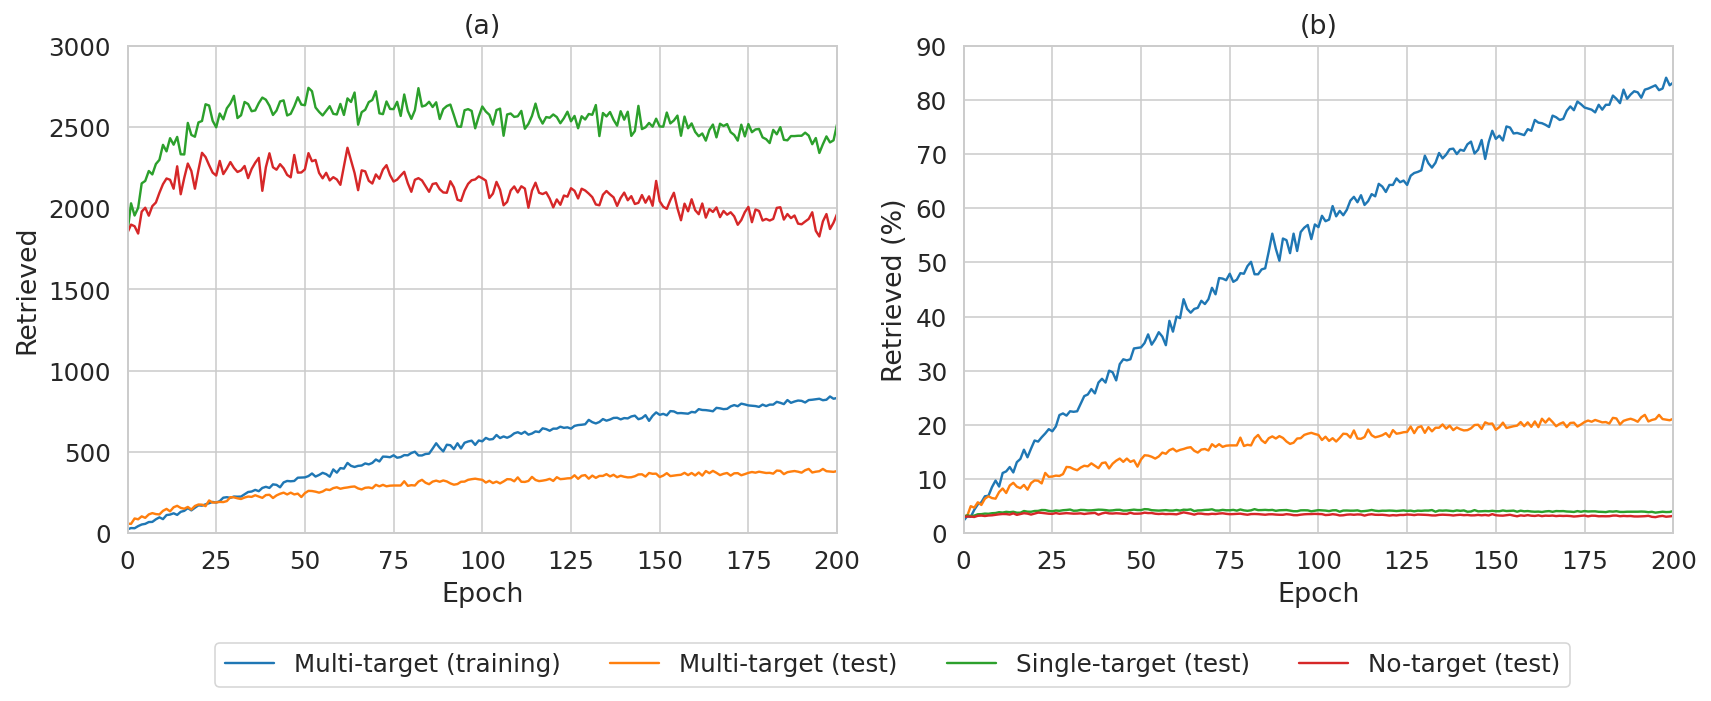

In [13]:

with sns.plotting_context("paper", font_scale=1.4):
    with sns.axes_style("whitegrid"):
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4.5)) 
        
        
        axes[0].plot(np.array(matches["multitarget training"])[:,0])
        axes[0].plot(np.array(matches["multitarget test"])[:,0])
        axes[0].plot(np.array(matches["singletarget test"])[:,0])
        axes[0].plot(np.array(matches["notarget test"])[:,0])
        axes[0].set_xlim(0,200)
        axes[0].set_ylim(0,3000)
        axes[0].set_xlabel("Epoch")
        axes[0].set_ylabel("Retrieved")
        axes[0].set_title("(a)")
        
        
        
        
        axes[1].plot(np.array(matches["multitarget training"])[:,1])
        axes[1].plot(np.array(matches["multitarget test"])[:,1])
        axes[1].plot(np.array(matches["singletarget test"])[:,1])
        axes[1].plot(np.array(matches["notarget test"])[:,1])
        axes[1].set_xlim(0,200)
        axes[1].set_ylim(0,90)
        axes[1].set_xlabel("Epoch")
        axes[1].set_ylabel("Retrieved (%)")
        axes[1].set_title("(b)")
        
        
        plt.tight_layout()
        lgd = plt.legend(["Multi-target (training)","Multi-target (test)","Single-target (test)","No-target (test)" ],loc='upper center', bbox_to_anchor=(-0.1,-0.2), ncol=4)
        
        if not os.path.exists("retrieved.svg"):
            fig.savefig("retrieved.svg", bbox_extra_artists=(lgd,), bbox_inches='tight')
        if not os.path.exists("retrieved.png"):
            fig.savefig("retrieved.png", dpi=400, bbox_extra_artists=(lgd,), bbox_inches='tight')

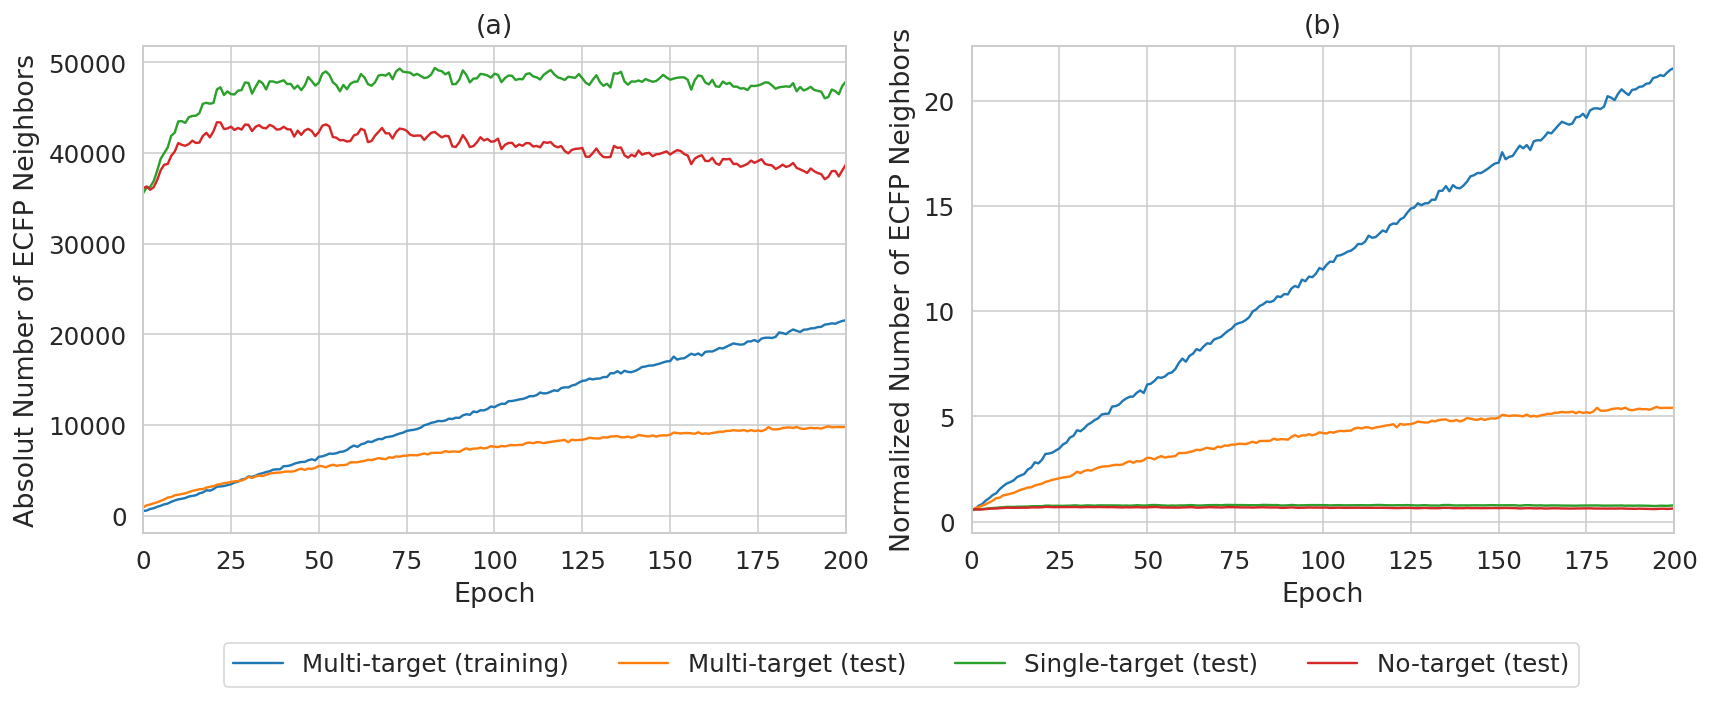

In [14]:
dist = 0.4

with sns.plotting_context("paper", font_scale=1.4):
    with sns.axes_style("whitegrid"):
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4.5)) 
        axes[0].plot(np.array(neighbors_without_matches[f"multitarget training {dist}"])[:,0])
        axes[0].plot(np.array(neighbors_without_matches[f"multitarget test {dist}"])[:,0])
        axes[0].plot(np.array(neighbors_without_matches[f"singletarget test {dist}"])[:,0])
        axes[0].plot(np.array(neighbors_without_matches[f"notarget test {dist}"])[:,0])
        axes[0].set_xlim(0,200)
        #plt.ylim(0,10)
        axes[0].set_xlabel("Epoch")
        axes[0].set_ylabel("Absolut Number of ECFP Neighbors")
        axes[0].set_title("(a)")
        
        for column in ['multitarget training', 'multitarget test', 'singletarget test', 'notarget test']:
            set_smiles = all_data.query("class_set == @column")["rdkit_smiles"]
            normalized_neighbors = np.array(neighbors_without_matches[f"{column} {dist}"])[:,0] / len(set_smiles)
            axes[1].plot(normalized_neighbors)

        axes[1].set_xlim(0,200)
        #plt.ylim(0,5)
        axes[1].set_xlabel("Epoch")
        axes[1].set_ylabel("Normalized Number of ECFP Neighbors")
        axes[1].set_title("(b)")
        
        
        plt.tight_layout()
        lgd = plt.legend(["Multi-target (training)","Multi-target (test)","Single-target (test)","No-target (test)" ],loc='upper center', bbox_to_anchor=(-0.1,-0.2), ncol=4)
        
        if not os.path.exists("neighbors.svg"):
            fig.savefig("neighbors.svg", bbox_extra_artists=(lgd,), bbox_inches='tight')
        if not os.path.exists("neighbors.png"):
            fig.savefig("neighbors.png", dpi=400, bbox_extra_artists=(lgd,), bbox_inches='tight')

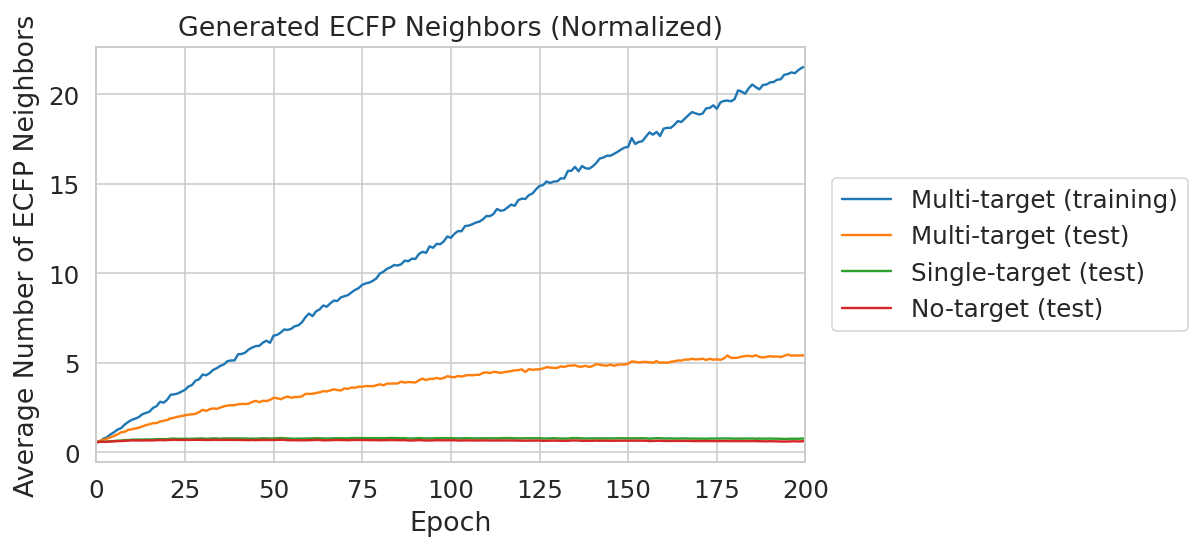

In [15]:
dist = 0.4
with sns.plotting_context("paper", font_scale=1.4):
    with sns.axes_style("whitegrid"):

        for column in ['multitarget training', 'multitarget test', 'singletarget test', 'notarget test']:
            set_smiles = all_data.query("class_set == @column")["rdkit_smiles"]
            normalized_neighbors = np.array(neighbors_without_matches[f"{column} {dist}"])[:,0] / len(set_smiles)
            plt.plot(normalized_neighbors)

        plt.xlim(0,200)
        #plt.ylim(0,5)
        plt.xlabel("Epoch")
        plt.ylabel("Average Number of ECFP Neighbors")
        plt.title("Generated ECFP Neighbors (Normalized)")
        plt.tight_layout()
        plt.legend(["Multi-target (training)","Multi-target (test)","Single-target (test)","No-target (test)" ],loc='center left', bbox_to_anchor=(1.02,0.5))

In [26]:
epoch = 200
class_set = "multitarget test"

data = pd.read_feather(f"sampled/{epoch}/processed_with_nn.feather").query("valid == 1").drop_duplicates("normalized_smiles")
set_smiles = all_data.query("class_set == @class_")["rdkit_smiles"]
matched_set = data.query("normalized_smiles in @set_smiles")
unmatched = data.query("normalized_smiles not in @all_data.rdkit_smiles")


In [27]:
examples = unmatched[(unmatched['multitarget test 0.3'] != 0)& (unmatched['multitarget training 0.1'] == 0)]
#examples.normalized_smiles.to_list()

In [28]:


import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from joblib import dump, load
from tqdm.auto import tqdm

import sys
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors, Crippen, Lipinski
from rdkit.Chem import PandasTools
import pandas as pd
from sklearn.linear_model import LinearRegression
from collections import namedtuple


class ESOLCalculator:
    aromatic_query = Chem.MolFromSmarts("a")
    Descriptor = namedtuple("Descriptor", "mw logp rotors ap")

    @classmethod
    def calc_ap(cls, mol):
        """
        Calculate aromatic proportion #aromatic atoms/#atoms total
        :param mol: input molecule
        :return: aromatic proportion
        """
        matches = mol.GetSubstructMatches(cls.aromatic_query)
        return len(matches) / mol.GetNumAtoms()

    @classmethod
    def calc_esol_descriptors(cls, mol):
        """
        Calcuate mw,logp,rotors and aromatic proportion (ap)
        :param mol: input molecule
        :return: named tuple with descriptor values
        """
        mw = Descriptors.MolWt(mol)
        logp = Crippen.MolLogP(mol)
        rotors = Lipinski.NumRotatableBonds(mol)
        ap = cls.calc_ap(mol)
        return cls.Descriptor(mw=mw, logp=logp, rotors=rotors, ap=ap)

    @classmethod
    def calc_esol_orig(cls, mol):
        """
        Original parameters from the Delaney paper, just here for comparison
        :param mol: input molecule
        :return: predicted solubility
        """
        # just here as a reference don't use this!
        intercept = 0.16
        coef = {"logp": -0.63, "mw": -0.0062, "rotors": 0.066, "ap": -0.74}
        desc = cls.calc_esol_descriptors(mol)
        esol = intercept + coef["logp"] * desc.logp + coef["mw"] * desc.mw + coef["rotors"] * desc.rotors \
               + coef["ap"] * desc.ap
        return esol

    @classmethod
    def calc_esol(cls, mol):
        """
        Calculate ESOL based on descriptors in the Delaney paper, coefficients refit for the RDKit using the
        routine refit_esol below
        :param mol: input molecule
        :return: predicted solubility
        """
        intercept = 0.26121066137801696
        coef = {'mw': -0.0066138847738667125, 'logp': -0.7416739523408995, 'rotors': 0.003451545565957996, 'ap': -0.42624840441316975}
        desc = cls.calc_esol_descriptors(mol)
        esol = intercept + coef["logp"] * desc.logp + coef["mw"] * desc.mw + coef["rotors"] * desc.rotors \
               + coef["ap"] * desc.ap
        return esol


    
def calculate_properties(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        valid = 1 if mol else 0
        normalized_smiles = Chem.MolToSmiles(mol)
        fp = AllChem.GetMorganFingerprintAsBitVect(mol,3, nBits=2048)
        ecfp6 = np.zeros((1,2048), np.uint8)
        AllChem.DataStructs.ConvertToNumpyArray(fp, ecfp6)
        hbd = Chem.rdMolDescriptors.CalcNumHBD(mol)
        hba = Chem.rdMolDescriptors.CalcNumHBA(mol)
        nrb = Chem.rdMolDescriptors.CalcNumRotatableBonds(mol)
        logp = Chem.rdMolDescriptors.CalcCrippenDescriptors(mol)[0]
        aqs = ESOLCalculator.calc_esol(mol)
        tpsa = Chem.rdMolDescriptors.CalcTPSA(mol)
        mw = Chem.rdMolDescriptors.CalcExactMolWt(mol)
        return ecfp6, hbd, hba, nrb, logp, aqs, tpsa, mw
    except:
        return np.zeros((1,2048), np.uint8), np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan
    
def get_fp(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        fp = AllChem.GetMorganFingerprintAsBitVect(mol,3, nBits=2048)
        ecfp6 = np.zeros((1,2048), np.uint8)
        AllChem.DataStructs.ConvertToNumpyArray(fp, ecfp6)
        ecfp6 = np.expand_dims(ecfp6, axis=0)
        return ecfp6
    except:
        return np.zeros((1,2048), np.uint8)
    
import numpy as np
import scipy.sparse
import torch

def tanimotokernel(data_1, data_2):
    if isinstance(data_1, scipy.sparse.csr_matrix) and isinstance(data_2, scipy.sparse.csr_matrix):
        return _sparse_tanimotokernel(data_1, data_2)
    elif isinstance(data_1, scipy.sparse.csr_matrix) or isinstance(data_2, scipy.sparse.csr_matrix):
        # try to sparsify the input
        return _sparse_tanimotokernel(scipy.sparse.csr_matrix(data_1), scipy.sparse.csr_matrix(data_2)) 
    elif isinstance(data_1, torch.Tensor) and isinstance(data_2, torch.Tensor):
        return _torch_dense_tanimotokernel(data_1, data_2)
    else:  # both are dense try np
        return _dense_tanimotokernel(data_1, data_2)
    
    
    
    
def _dense_tanimotokernel(data_1, data_2):
    """
    Tanimoto kernel
        K(x, y) = <x, y> / (||x||^2 + ||y||^2 - <x, y>)
    as defined in:
    "Graph Kernels for Chemical Informatics"
    Liva Ralaivola, Sanjay J. Swamidass, Hiroto Saigo and Pierre Baldi
    Neural Networks
    https://www.sciencedirect.com/science/article/pii/S0893608005001693
    http://members.cbio.mines-paristech.fr/~jvert/svn/bibli/local/Ralaivola2005Graph.pdf
    """

    norm_1 = (data_1 ** 2).sum(axis=1).reshape(data_1.shape[0], 1)
    norm_2 = (data_2 ** 2).sum(axis=1).reshape(data_2.shape[0], 1)
    prod = data_1.dot(data_2.T)

    divisor = (norm_1 + norm_2.T - prod) + np.finfo(data_1.dtype).eps
    return prod / divisor



def _sparse_tanimotokernel(data_1, data_2):
    """
    Tanimoto kernel
        K(x, y) = <x, y> / (||x||^2 + ||y||^2 - <x, y>)
    as defined in:
    "Graph Kernels for Chemical Informatics"
    Liva Ralaivola, Sanjay J. Swamidass, Hiroto Saigo and Pierre Baldi
    Neural Networks
    https://www.sciencedirect.com/science/article/pii/S0893608005001693
    http://members.cbio.mines-paristech.fr/~jvert/svn/bibli/local/Ralaivola2005Graph.pdf
    """

    norm_1 = np.array(data_1.power(2).sum(axis=1).reshape(data_1.shape[0], 1))
    norm_2 = np.array(data_2.power(2).sum(axis=1).reshape(data_2.shape[0], 1))
    prod = data_1.dot(data_2.T).A

    divisor = (norm_1 + norm_2.T - prod) + np.finfo(data_1.dtype).eps
    result = prod / divisor
    return result

def _torch_dense_tanimotokernel(data_1, data_2):
    """
    Tanimoto kernel
        K(x, y) = <x, y> / (||x||^2 + ||y||^2 - <x, y>)
    as defined in:
    "Graph Kernels for Chemical Informatics"
    Liva Ralaivola, Sanjay J. Swamidass, Hiroto Saigo and Pierre Baldi
    Neural Networks
    https://www.sciencedirect.com/science/article/pii/S0893608005001693
    http://members.cbio.mines-paristech.fr/~jvert/svn/bibli/local/Ralaivola2005Graph.pdf
    """
    norm_1 = (data_1 ** 2).sum(axis=1).reshape(data_1.shape[0], 1)
    norm_2 = (data_2 ** 2).sum(axis=1).reshape(data_2.shape[0], 1)
    prod = data_1 @ data_2.T

    divisor = (norm_1 + norm_2.T - prod) + torch.finfo(data_1.dtype).eps
    prod /= divisor
    return prod

def read_npz(file):
    file = np.load(file)
    if "arr_0" in file:
        fp = file["arr_0"]
    else:
        fp = file["fps"]
    file.close()
    fp = np.unpackbits(fp, axis=1)
    return fp

import torch 

def set_default_device_cuda():
    """Sets the default device (cpu or cuda) used for all tensors."""
    if torch.cuda.is_available() == False:
        tensor = torch.FloatTensor
        torch.set_default_tensor_type(tensor)
        return False
    else:  # device_name == "cuda":
        tensor = torch.cuda.FloatTensor  # pylint: disable=E1101
        torch.set_default_tensor_type(tensor)
        return True

    
def read_epoch(epoch):
    sampled_df = pd.read_feather(f"sampled/{epoch}/processed.feather")
    sampled_ecfp = np.array(read_npz(f"sampled/{epoch}/processed_fp.npz"),dtype=np.uint8)
    return sampled_df, sampled_ecfp




set_default_device_cuda()
    
ecfp6 = read_npz("output/processed_fp.npz")
ecfp6 = torch.tensor(ecfp6, dtype=torch.float)
all_data = pd.read_feather("output/processed.feather")
all_data["class_set"] = all_data[["class","set"]].apply(lambda x: ' '.join(x), axis=1)
subsets = list(all_data.class_set.unique())
distances = [0.1, 0.3, 0.4, 0.5]

In [29]:
def find_nns(smiles):
    sampled_ecfp = get_fp(smiles)
    sampled_ecfp = torch.tensor(sampled_ecfp, dtype=torch.float)
    dists = 1 - tanimotokernel(sampled_ecfp,ecfp6)
    return dists
        
dist = find_nns("COCC=CC1=CC2=CC(=O)C(C)(OC(=O)C3CCCCC3)C(=O)C2=CO1")
all_data["dist"] = dist.cpu().numpy().ravel()

In [30]:
all_data.query("dist < 0.1")

,cids,NostereoAromaticSMILES,rdkit_smiles,class,set,inactive,active,encodable,hbd,hba,nrb,logp,aqs,tpsa,mw,class_set,dist
253,16745662,CC1(C(=O)C=C2C=C(OC=C2C1=O)C=CCOC)OC(=O)C3CCCC3,COCC=CC1=CC2=CC(=O)C(C)(OC(=O)C3CCCC3)C(=O)C2=CO1,multitarget,test,181,11,True,0,6,5,2.5573,-3.988565,78.9,358.141638,multitarget test,0.054054


In [31]:
all_data.iloc[(dist <= 0.4).cpu().numpy().ravel()]

,cids,NostereoAromaticSMILES,rdkit_smiles,class,set,inactive,active,encodable,hbd,hba,nrb,logp,aqs,tpsa,mw,class_set,dist
253,16745662,CC1(C(=O)C=C2C=C(OC=C2C1=O)C=CCOC)OC(=O)C3CCCC3,COCC=CC1=CC2=CC(=O)C(C)(OC(=O)C3CCCC3)C(=O)C2=CO1,multitarget,test,181,11,True,0,6,5,2.5573,-3.988565,78.9,358.141638,multitarget test,0.054054


In [32]:
all_data.query("dist < 0.5 and set == 'training'")

,cids,NostereoAromaticSMILES,rdkit_smiles,class,set,inactive,active,encodable,hbd,hba,nrb,logp,aqs,tpsa,mw,class_set,dist
254,16745613,CC1(C(=O)C=C2C=C(OC=C2C1=O)C=CCOC)OC(=O)c3ccco3,COCC=CC1=CC2=CC(=O)C(C)(OC(=O)c3ccco3)C(=O)C2=CO1,multitarget,training,78,6,True,0,7,5,2.2739,-3.846720,92.04,356.089603,multitarget training,0.406593
255,16759501,CC1(C(=O)C=C2C=C(OC=C2C1=O)C=CCOC)OC(=O)c3cnc4...,COCC=CC1=CC2=CC(=O)C(C)(OC(=O)c3cnc4ccccc4n3)C...,multitarget,training,50,6,True,0,8,5,2.6241,-4.572540,104.68,418.116486,multitarget training,0.470588
256,16745664,CC1(C(=O)C=C2C=C(OC=C2C1=O)CCCC(=O)OC)OC(=O)C3...,COC(=O)CCCC1=CC2=CC(=O)C(C)(OC(=O)C3CCCC3)C(=O...,multitarget,training,131,5,True,0,7,6,2.6980,-4.288055,95.97,388.152203,multitarget training,0.494845


In [40]:
all_data.query("NostereoAromaticSMILES == 'c1ccc(cc1)N2CCN(CC2)C(=O)c3ccc4c(c3)nc(c(n4)c5ccco5)c6ccco6'")

,cids,NostereoAromaticSMILES,rdkit_smiles,class,set,inactive,active,encodable,hbd,hba,nrb,logp,aqs,tpsa,mw,class_set,dist
2507,2214934,c1ccc(cc1)N2CCN(CC2)C(=O)c3ccc4c(c3)nc(c(n4)c5...,O=C(c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1)N1CCN(c...,multitarget,test,234,6,True,0,6,4,5.1122,-6.822065,75.61,450.169191,multitarget test,0.857143


In [36]:
x = {"generated": [], "known_smi": [], "known_dist": [], "set": []}
    
for smi in examples.normalized_smiles.to_list():
    dist = find_nns(smi) 
    all_data["dist"] = dist.cpu().numpy().ravel()
    training_smis, training_dists = all_data.query("dist <= 0.6 and set == 'training'")["NostereoAromaticSMILES"].to_list(), all_data.query("dist <= 0.6 and set == 'training'")["dist"].to_list()
    test_smis, test_dists = all_data.query("dist <= 0.6 and set == 'test'")["NostereoAromaticSMILES"].to_list(), all_data.query("dist <= 0.6 and set == 'test'")["dist"].to_list()

    training_smis = np.array(training_smis)
    training_dists = np.array(training_dists)
    test_smis = np.array(test_smis)
    test_dists = np.array(test_dists)
    training_dists_idx = np.argsort(training_dists)
    test_dists_idx = np.argsort(test_dists)
    
    training_smis = training_smis[training_dists_idx]
    training_dists =  training_dists[training_dists_idx]
    
    test_smis = test_smis[test_dists_idx]
    test_dists = test_dists[test_dists_idx]
    
    #print(smi)
    #print(Chem.MolFromSMILES(list(training_smis)[0]), list(training_dists))
    #print(list(test_smis), list(test_dists))
    for a,b in zip(training_smis, training_dists):
        x['generated'].append(smi)
        x['known_smi'].append(a)
        x['known_dist'].append(b)
        x['set'].append("training")
        break
        
    for a,b in zip(test_smis, test_dists):
        x['generated'].append(smi)
        x['known_smi'].append(a)
        x['known_dist'].append(b)
        x['set'].append("test")
        break

,generated,known_smi,known_dist,set,Moleculeg,Moleculek
0,Cc1ccc(NC(=O)CSc2sc3c(O)cc(=O)[nH]c3c2C#N)cc1,c1cc(cc(c1)F)NC(=O)CSc2c(c3c(s2)c(cc(=O)[nH]3)...,0.333333,training,,
1,Cc1ccc(NC(=O)CSc2sc3c(O)cc(=O)[nH]c3c2C#N)cc1,Cc1ccc(cc1C)NC(=O)CSc2c(c3c(s2)c(cc(=O)[nH]3)O...,0.240506,test,,
2,O=C(O)c1ccccc1NS(=O)(=O)c1ccc(NN=Cc2cccc(Br)c2...,c1ccc(c(c1)C(=O)O)NS(=O)(=O)c2ccc(c(c2)[N+](=O...,0.218391,training,,
3,O=C(O)c1ccccc1NS(=O)(=O)c1ccc(NN=Cc2cccc(Br)c2...,c1ccc(c(c1)C(=O)O)NS(=O)(=O)c2ccc(c(c2)[N+](=O...,0.284091,test,,
4,Cc1ccc(C(=O)Cn2c(=N)n(Cc3ccccc3)c3ccccc32)cc1,c1ccc(cc1)Cn2c3ccccc3n(c2=N)CC(=O)c4ccc(s4)Br,0.430556,training,,
...,...,...,...,...,...,...
4594,CCN(CC)CCCn1c(N)c(S(=O)(=O)c2ccc(C)cc2)c2nc3cc...,Cc1ccc(cc1)S(=O)(=O)c2c3c(nc4ccccc4n3)n(c2N)CC...,0.197368,test,,
4595,NC(=O)NC(=O)NC(=O)COC(=O)c1cc(-c2ccco2)nc2ccccc12,CCNC(=O)COC(=O)c1cc(nc2c1cccc2)c3ccco3,0.304878,training,,
4596,NC(=O)NC(=O)NC(=O)COC(=O)c1cc(-c2ccco2)nc2ccccc12,CNC(=O)COC(=O)c1cc(nc2c1cccc2)c3ccco3,0.269231,test,,
4597,CC(=O)c1ccc(NC(=O)CN(C)C(=O)c2cccc(-n3cccc3)c2...,Cc1ccc(cc1)NC(=O)CN(C)C(=O)c2cccc(c2)n3cccc3,0.202899,training,,

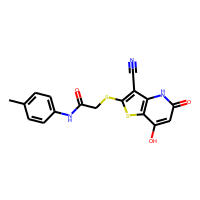
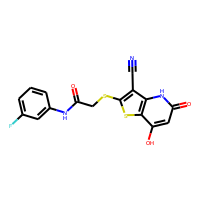
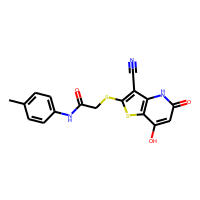
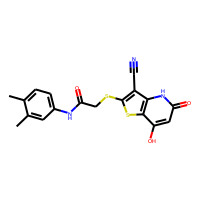
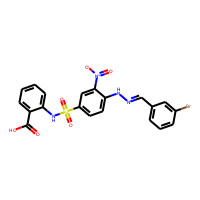
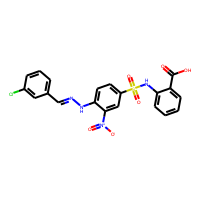
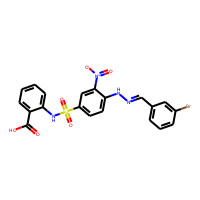
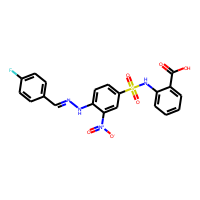
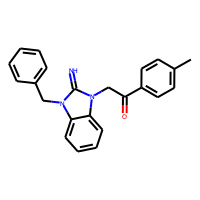
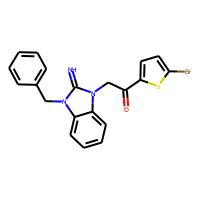
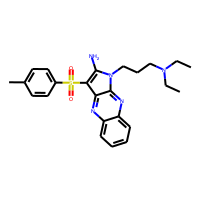
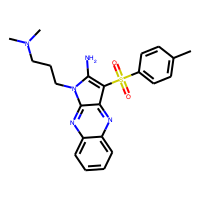
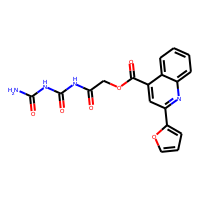
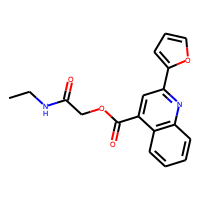
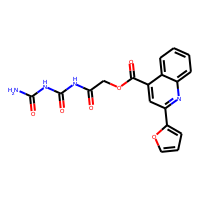
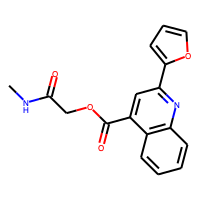
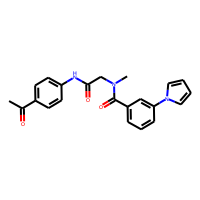
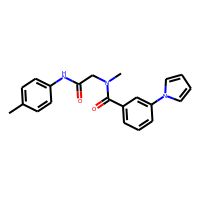
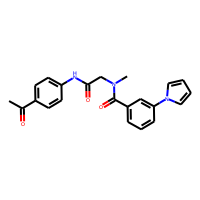
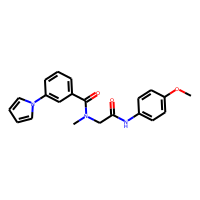

In [34]:
from rdkit.Chem import PandasTools

x = pd.DataFrame(x)

PandasTools.AddMoleculeColumnToFrame(x ,'generated','Moleculeg',includeFingerprints=True)
PandasTools.AddMoleculeColumnToFrame(x ,'known_smi','Moleculek',includeFingerprints=True)
x

In [35]:
with open("epoch200_compounds.html", "w") as fd:
    fd.write(x.to_html())

In [66]:
dist = find_nns("Nc1c(C(=O)O)sc2nc3c(c(-c4cccs4)c12)CCCC3")
all_data["dist"] = dist.cpu().numpy().ravel()

In [70]:
all_data.query("set == 'training'").sort_values("dist").iloc[1]["rdkit_smiles"]

'Cc1nnc(NC(=O)c2sc3nc(-c4cccs4)cc(C(F)(F)F)c3c2N)s1'

In [68]:
all_data.query("set == 'test'").sort_values("dist")

,cids,NostereoAromaticSMILES,rdkit_smiles,class,set,inactive,active,encodable,hbd,hba,nrb,logp,aqs,tpsa,mw,class_set,dist
54908,652226,c1cc(sc1)c2c3c(nc4c2c(c(s4)C(=O)N)N)CCCC3,NC(=O)c1sc2nc3c(c(-c4cccs4)c2c1N)CCCC3,singletarget,test,116,1,True,2,5,2,3.58470,-4.840758,82.00,329.065654,singletarget test,0.205882
26177,949348,COC(=O)c1c(c2c(c3c(nc2s1)CCCC3)c4cccs4)N,COC(=O)c1sc2nc3c(c(-c4cccs4)c2c1N)CCCC3,singletarget,test,223,1,True,1,6,2,4.27240,-5.438295,65.21,344.065320,singletarget test,0.250000
2213,940059,c1cc(sc1)c2c3c(nc4c2c(c(s4)C(=O)N)N)CCCCC3,NC(=O)c1sc2nc3c(c(-c4cccs4)c2c1N)CCCCC3,multitarget,test,229,7,True,2,5,2,3.97480,-5.211065,82.00,343.081304,multitarget test,0.277778
2850,2746709,C#Cc1cccc(c1)NC(=O)c2c(c3c(c4c(nc3s2)CCCC4)c5c...,C#Cc1cccc(NC(=O)c2sc3nc4c(c(-c5cccs5)c3c2N)CCC...,singletarget,test,4,1,True,2,5,3,5.71940,-7.095657,68.01,429.096954,singletarget test,0.413043
44474,866470,Cc1ccc(o1)c2c3c(nc4c2c(c(s4)C(=O)N)N)CCCC3,Cc1ccc(-c2c3c(nc4sc(C(N)=O)c(N)c24)CCCC3)o1,singletarget,test,228,1,True,2,5,2,3.42462,-4.696739,95.14,327.104148,singletarget test,0.529412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21614,"5413,5946",CC[N+](CC)(CC)CC,CC[N+](CC)(CC)CC,singletarget,test,219,1,True,0,0,4,1.88280,-1.982898,0.00,130.159026,singletarget test,1.000000
89457,31214,CCOC(OCC)OCC,CCOC(OCC)OCC,notarget,test,12,0,True,0,3,6,1.37950,-1.721410,27.69,148.109944,notarget test,1.000000
111516,221260,CCC(C)(OOC(C)(C)C)OOC(C)(C)C,CCC(C)(OOC(C)(C)C)OOC(C)(C)C,notarget,test,12,0,True,0,4,5,3.60600,-3.945879,36.92,234.183109,notarget test,1.000000
2878,22772,C(SC#N)SC#N,N#CSCSC#N,singletarget,test,19,1,True,0,4,2,1.37246,-1.610912,47.58,129.965940,singletarget test,1.000000


In [98]:
def get_matches(epoch):
    data = pd.read_feather(f"sampled/{epoch}/processed_with_nn.feather").query("valid == 1").drop_duplicates("normalized_smiles")
    generated_smiles = set(data["normalized_smiles"].to_list())
    return all_data.query("rdkit_smiles in @generated_smiles")

In [108]:
m  = get_matches(30)

In [109]:
m[m["class"] == "multitarget"]

,cids,NostereoAromaticSMILES,rdkit_smiles,class,set,inactive,active,encodable,hbd,hba,nrb,logp,aqs,tpsa,mw,class_set,dist
2,16195846,C#Cc1ccc(cc1)C2CC(OC(=C2)C(=O)N3CCN(CC3)Cc4ccc...,C#Cc1ccc(C2C=C(C(=O)N3CCN(Cc4ccccc4)CC3)OC(OCC...,multitarget,training,151,6,True,1,5,9,3.51530,-5.600031,62.24,474.251858,multitarget training,0.921875
3,15910,C(#N)c1c(c(c(c(c1Cl)Cl)Cl)C#N)Cl,N#Cc1c(Cl)c(Cl)c(Cl)c(C#N)c1Cl,multitarget,test,24,5,True,0,2,0,4.04356,-4.679195,47.58,263.881559,multitarget test,0.985915
11,24686900,C1CC(=O)N(C1)C(=O)COC(=O)c2c(c(c(c(n2)Cl)Cl)Cl)Cl,O=C(OCC(=O)N1CCCC1=O)c1nc(Cl)c(Cl)c(Cl)c1Cl,multitarget,training,171,6,True,0,5,3,3.00100,-4.623526,76.57,383.923817,multitarget training,0.940000
14,428478,C1CC2C=CC1C(C2C(=O)O)C(=O)O,O=C(O)C1C2C=CC(CC2)C1C(=O)O,multitarget,training,223,8,True,2,2,2,0.98400,-1.759351,74.60,196.073559,multitarget training,0.927536
24,"6398970,6399253,6413100,6915944",C=CC1=C(N2C(C(C2=O)NC(=O)C(=NO)c3csc(n3)N)SC1)...,C=CC1=C(C(=O)O)N2C(=O)C(NC(=O)C(=NO)c3csc(N)n3...,multitarget,training,162,8,True,4,9,5,-0.17180,-2.291358,158.21,395.035811,multitarget training,0.883929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782,665693,c1ccnc(c1)c2cc(c(c(n2)N)C#N)c3ccco3,N#Cc1c(-c2ccco2)cc(-c2ccccn2)nc1N,multitarget,training,238,5,True,1,5,2,2.85748,-3.948153,88.73,262.085461,multitarget training,0.873684
2787,764647,c1ccnc(c1)c2csc(n2)NC(=O)c3ccc(o3)[N+](=O)[O-],O=C(Nc1nc(-c2ccccn2)cs1)c1ccc([N+](=O)[O-])o1,multitarget,training,191,12,True,1,7,4,2.95860,-4.321257,111.16,316.026626,multitarget training,0.802083
2800,3698,c1cnccc1c2cc(c(=O)[nH]c2)N,Nc1cc(-c2ccncc2)c[nH]c1=O,multitarget,training,235,10,True,2,3,1,1.01910,-2.094666,71.77,187.074562,multitarget training,0.902439
2804,2532005,c1csc(c1C#N)NC(=O)CSc2nncs2,N#Cc1ccsc1NC(=O)CSc1nncs1,multitarget,training,140,5,True,1,7,4,2.20208,-3.476539,78.67,281.970374,multitarget training,0.895833


In [112]:
m.query("class_set == 'multitarget test'")

,cids,NostereoAromaticSMILES,rdkit_smiles,class,set,inactive,active,encodable,hbd,hba,nrb,logp,aqs,tpsa,mw,class_set,dist
3,15910,C(#N)c1c(c(c(c(c1Cl)Cl)Cl)C#N)Cl,N#Cc1c(Cl)c(Cl)c(Cl)c(C#N)c1Cl,multitarget,test,24,5,True,0,2,0,4.04356,-4.679195,47.58,263.881559,multitarget test,0.985915
26,2957802,C=CC1=C(N2C(C(C2=O)NC(=O)Cc3ccccc3)SC1)C(=O)O,C=CC1=C(C(=O)O)N2C(=O)C(NC(=O)Cc3ccccc3)C2SC1,multitarget,test,219,12,True,2,4,5,1.15370,-2.961532,86.71,344.083078,multitarget test,0.883495
54,16745485,CC(=C)C(=O)Nc1cccc(c1)C2=NOC3(C2)CC(N(C3)C(=O)...,C=C(C)C(=O)Nc1cccc(C2=NOC3(C2)CC(C(N)=O)N(C(=O...,multitarget,test,120,6,True,2,6,5,1.06428,-3.214325,137.88,395.159354,multitarget test,0.921260
58,16745473,CC(=C)C(=O)Nc1cccc(c1)C2=NOC3(C2)CC(N(C3)C(=O)...,C=C(C)C(=O)Nc1cccc(C2=NOC3(C2)CC(C(N)=O)N(C(=O...,multitarget,test,112,13,True,2,5,5,3.11780,-5.277110,114.09,466.140783,multitarget test,0.913386
64,"6860017,895803",CC(=Cc1ccccc1)C=Nn2c(n[nH]c2=S)c3ccncc3,CC(C=Nn1c(-c2ccncc2)n[nH]c1=S)=Cc1ccccc1,multitarget,test,218,5,True,1,5,4,3.94009,-5.088061,58.86,321.104816,multitarget test,0.871287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2730,314707,c1ccc2c(c1)cccc2N=Cc3ccc(s3)[N+](=O)[O-],O=[N+]([O-])c1ccc(C=Nc2cccc3ccccc23)s1,multitarget,test,184,6,True,0,4,3,4.56010,-5.297487,55.50,282.046299,multitarget test,0.919192
2749,2007528,c1ccc2c(c1)nc3c(n2)N(CN3Cc4ccco4)S(=O)(=O)c5cccs5,O=S(=O)(c1cccs1)N1CN(Cc2ccco2)c2nc3ccccc3nc21,multitarget,test,196,6,True,0,7,4,3.45730,-5.240340,79.54,398.050732,multitarget test,0.918919
2772,3504072,c1ccnc(c1)C(=O)NNC(=O)C23CC4CC(C2)CC(C4)C3,O=C(NNC(=O)C12CC3CC(CC(C3)C1)C2)c1ccccn1,multitarget,test,202,5,True,2,3,2,2.05900,-3.355268,71.09,299.163377,multitarget test,0.756098
2775,"16193305,46495021",c1ccnc(c1)C=NNC(=O)c2cc(cc(c2)[N+](=O)[O-])[N+...,O=C(NN=Cc1ccccn1)c1cc([N+](=O)[O-])cc([N+](=O)...,multitarget,test,218,6,True,1,7,5,1.66190,-3.261504,140.63,315.060368,multitarget test,0.770115
